# Data loading 

In [9]:
!pip install openpyxl

In [10]:
import pandas as pd

# Read the XLSX file into a Pandas dataframe
df = pd.read_excel('IEEE compétition.xlsx')

# Export the dataframe to a CSV file
df.to_csv('example.csv', index=False)

In [11]:
df.head()

,numero patient,age patient,sexe,Les Urgences En MED DENT,Douleur Spontanée,Douleur Provoquée,Mobilité,Vitalité,Palpation Apicale,Fievre,Asthenie,Odeur Fétide,Médication ATG,Soulager,Observations Exobuccales ( remarque generale )
0,50,5,femme,Pulpite reversible,Non,Froid,Non,Dent vivante,Négatif,Non,Non,Non,Efficace,eviter la cause,Non
1,60,13,homme,Pulpite reversible,Non,Sucre,Non,Dent vivante,Négatif,Non,Non,Non,Efficace,eviter la cause,Non
2,70,12,femme,Pulpite reversible,récente,froid,Non,Dent vivante,Négatif,Non,Non,Non,Efficace,eviter la cause,Non
3,80,15,femme,Pulpite reversible,récente,Sucre,Non,Dent vivante,Négatif,Non,Non,Non,Efficace,eviter la cause,Non
4,10,28,femme,Pulpite irreversible symptomatique,Intense,Chaud,Non,Dent vivante,Negatif,Non,Non,Non,"Efficace , si stade avancée non",Froid,Non


In [12]:
df["Les Urgences En MED DENT"].value_counts()

Pulpite irreversible symptomatique      20
Pulpite reversible                       9
Cellulite                                3
Pulpite irreversible asymptomatique      2
 Parodontite apicale aiguë               2
 Abcès apicale Aigu                      2
Abcès apical chronique                   2
Septite                                  2
Gingivite                                2
 Traumatisme Dentaire                    2
Extrusion dentaire                       2
Péricoronarite                           2
 Pulpite irreversible asymptomatique     1
Parodontite apicale aiguë                1
Abcès apicale Aigu                       1
Name: Les Urgences En MED DENT, dtype: int64

# Data cleaning 

In [13]:
# drop the client number column 
df = df.drop(df.columns[0], axis=1)

In [14]:
# rename some columns 
df.rename(columns={'age  patient ': 'Age Patient', 'Soulager ': 'Soulager', "sexe": "Sexe"}, inplace=True)

In [15]:
# Remove all extra spaces
def remove_all_extra_spaces(string):
    return " ".join(string.split())

In [16]:
# apply lowercase 
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# Remove all extra spaces
df = df.applymap(lambda x: remove_all_extra_spaces(x) if isinstance(x, str) else x)

In [17]:
# Define a dictionary with the replacements
sex_replace_dict = {
    'femme femme': 'femme'}
df["Sexe"] = df["Sexe"].apply(lambda x: "homme" if "homme" in x or "male" in x else "femme") # 1 for male 0 for female 
vitalite_replace_dict = {
    'vivante': 'dent vivante',
    'oui': 'dent vivante'
}
palpation_replace_dict = {
    'négatif': 'negatif',
    'non': 'negatif'
}
odeur_replace_dict = {
    'odeur fétide': 'oui'
}
medication_replace_dict = {
    'non': 'non efficace',
    'oui': 'efficace'
}
df['Sexe'] = df['Sexe'].replace(sex_replace_dict)
df['Vitalité'] = df['Vitalité'].replace(vitalite_replace_dict)
df['Palpation Apicale'] = df['Palpation Apicale'].replace(palpation_replace_dict)
df['Odeur Fétide'] = df['Odeur Fétide'].replace(odeur_replace_dict)

df['Médication ATG'] = df['Médication ATG'].replace(medication_replace_dict)

In [18]:
# Dropping the patient with irrelavent age 
df = df.drop(index=df[df['Age Patient'] >300 ].index) # try using the mean later 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 52
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Age Patient                                      52 non-null     int64 
 1   Sexe                                             52 non-null     object
 2   Les Urgences En MED DENT                         52 non-null     object
 3   Douleur Spontanée                                52 non-null     object
 4   Douleur Provoquée                                52 non-null     object
 5   Mobilité                                         52 non-null     object
 6   Vitalité                                         52 non-null     object
 7   Palpation Apicale                                52 non-null     object
 8   Fievre                                           52 non-null     object
 9   Asthenie                                     

In [20]:
df['Odeur Fétide'].unique()

array(['non', 'oui', 'oui avec mauvais gout'], dtype=object)

In [21]:
# making sure it's all clean 
for col in df.columns:
  print("feature: ",col)
  print(df[col].unique())

feature:  Age Patient
[ 5 13 12 15 28 88 32 11 58 55 26 69 54 74  3  6 85 19 25 35 36 37  1 14
  8 66 59 64 57 51 52 56  2 38 39 50]
feature:  Sexe
['femme' 'homme']
feature:  Les Urgences En MED DENT
['pulpite reversible' 'pulpite irreversible symptomatique'
 'pulpite irreversible asymptomatique' 'parodontite apicale aiguë'
 'abcès apicale aigu' 'cellulite' 'abcès apical chronique' 'septite'
 'gingivite' 'traumatisme dentaire' 'extrusion dentaire' 'péricoronarite']
feature:  Douleur Spontanée
['non' 'récente' 'intense' 'pulsatile' 'irradiée' 'prolongée' 'oui'
 'continue' 'occassionnellement' "oui irradiante vers l'oreil"]
feature:  Douleur Provoquée
['froid' 'sucre' 'chaud' 'position allongée' 'effort physique'
 'parfois a la mastication' 'mastication' 'pression' 'non' 'au contact']
feature:  Mobilité
['non' 1 '1+' 'oui']
feature:  Vitalité
['dent vivante' 'dent morte']
feature:  Palpation Apicale
['negatif' 'douleur avec comblement' 'douleur si pression' 'oui']
feature:  Fievre
['non

#   Getting to know the Data

### plotting distributions 

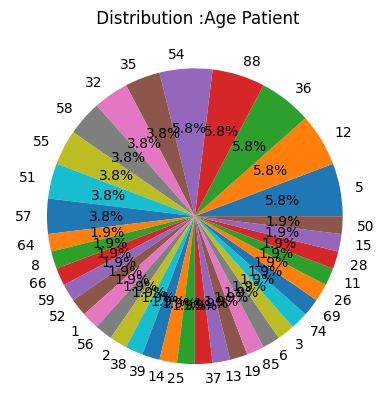

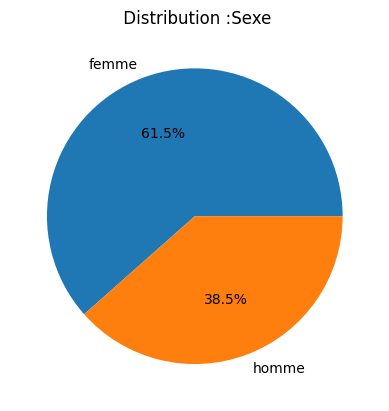

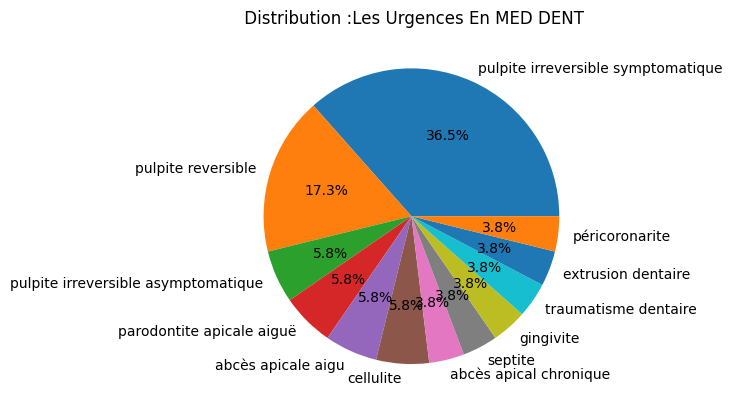

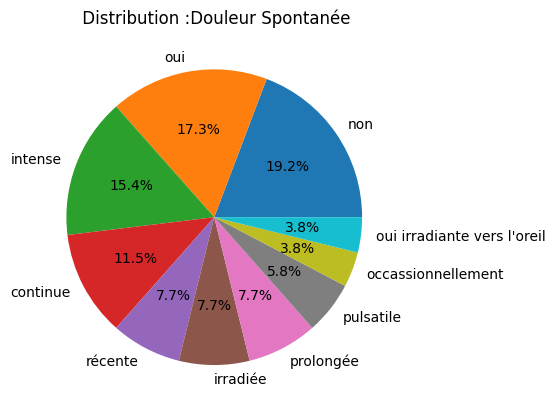

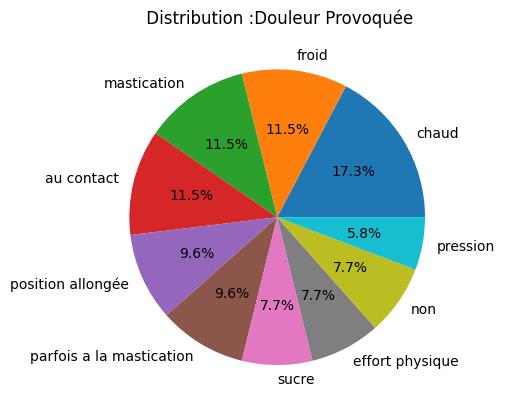

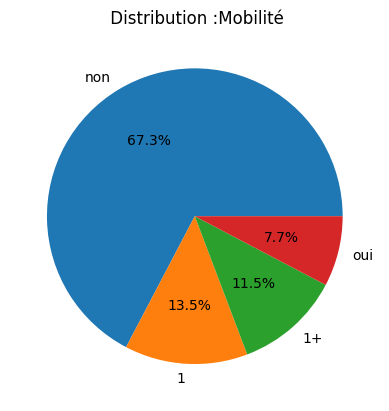

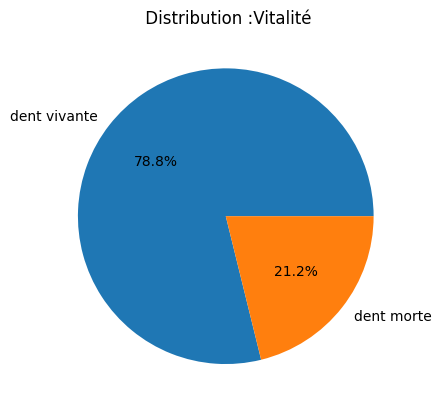

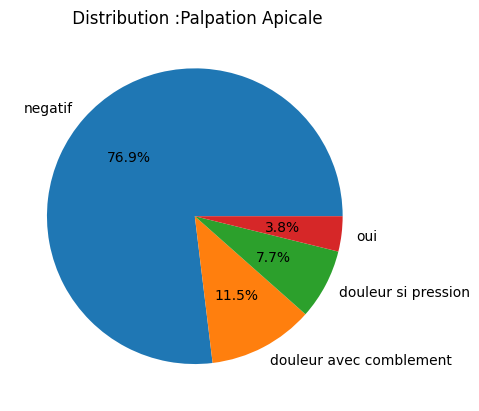

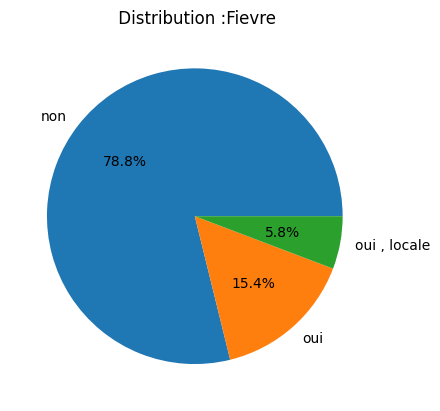

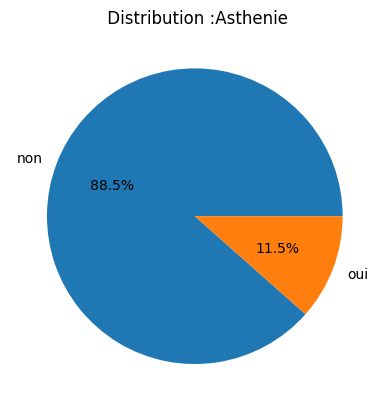

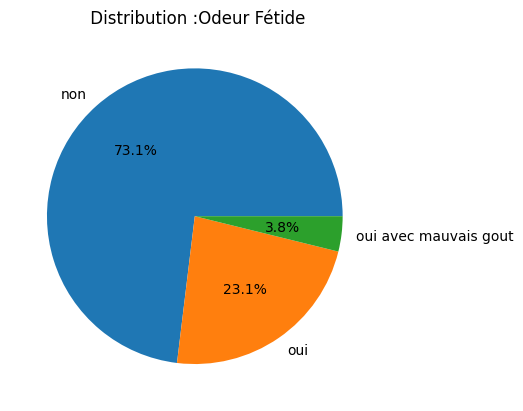

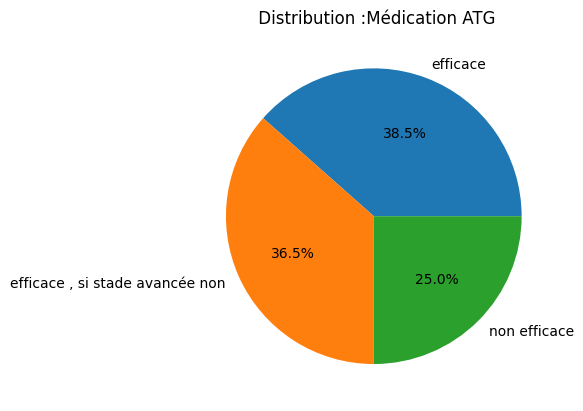

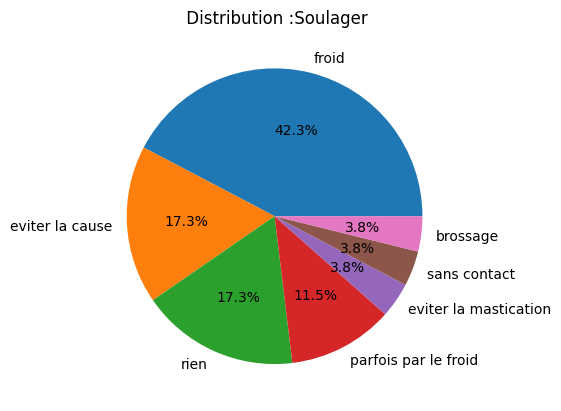

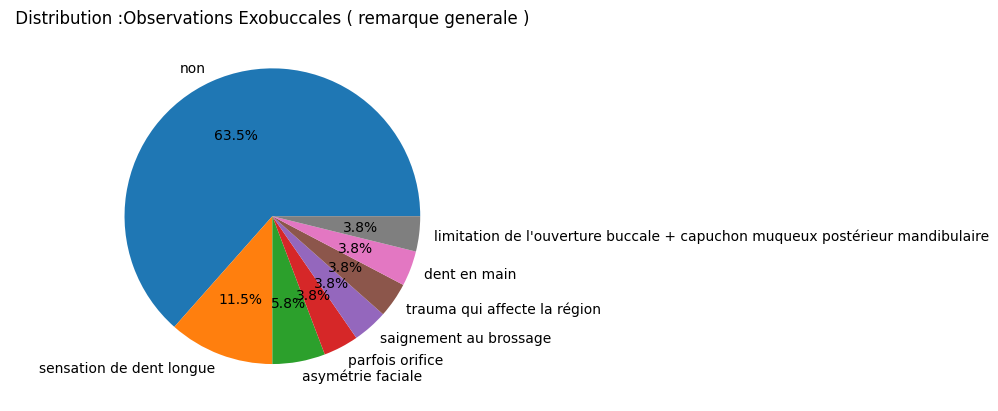

In [22]:
import matplotlib.pyplot as plt

for col in df.columns:
    fig, ax = plt.subplots()
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.title(' Distribution :' +col , loc='center')
    plt.show()

Text(0.5, 0, 'Nombre de patients')

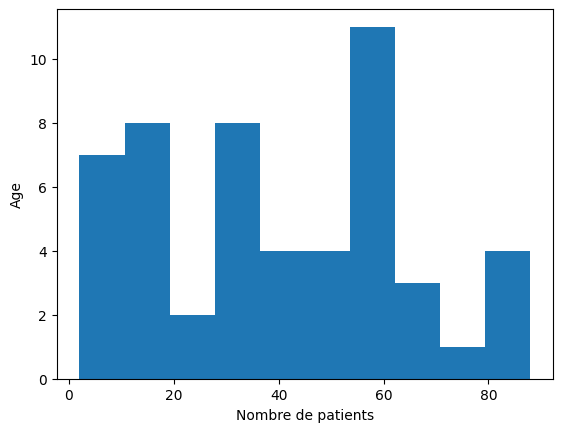

In [23]:
age_mean = round(df["Age Patient"].mean())
df["Age Patient"] = df["Age Patient"].apply(lambda x: age_mean if x == 1 or x > 100 else x)
df["Age Patient"] = df["Age Patient"].apply(lambda x: age_mean if x == 1 or x > 100 else x)
plt.hist(df["Age Patient"])
plt.ylabel("Age")
plt.xlabel("Nombre de patients")

In [24]:
from sklearn.preprocessing import LabelEncoder
import copy

In [25]:
data_cp = copy.deepcopy(df)

In [26]:
# Convert all values into strings
for col in data_cp.columns:
    if col != "Age Patient":
        data_cp = data_cp.applymap(lambda x: str(x))

In [27]:
label_encoders = {col: LabelEncoder() for col in data_cp.columns if col != "Age Patient"} 

In [28]:
for col in data_cp.columns:
    if col == "Age Patient":
        continue
    if isinstance(data_cp[col][0], str):  # check if column is of object (i.e., string) type
        data_cp[col] = label_encoders[col].fit_transform(data_cp[col])

In [29]:
for col in data_cp.columns:
    if col != "Age Patient":
        print(data_cp[col])
        print(col,label_encoders[col].inverse_transform(data_cp[col]))

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
11    0
12    1
13    0
14    0
15    1
16    1
17    0
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    1
27    1
28    1
29    0
30    0
31    0
32    0
33    0
34    1
35    0
36    1
37    0
38    0
39    0
40    1
41    0
42    0
43    0
44    0
45    1
46    0
47    1
48    0
49    0
50    1
51    1
52    0
Name: Sexe, dtype: int32
Sexe ['femme' 'homme' 'femme' 'femme' 'femme' 'homme' 'femme' 'femme' 'femme'
 'femme' 'femme' 'homme' 'femme' 'femme' 'homme' 'homme' 'femme' 'homme'
 'femme' 'homme' 'homme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme'
 'homme' 'femme' 'femme' 'femme' 'femme' 'femme' 'homme' 'femme' 'homme'
 'femme' 'femme' 'femme' 'homme' 'femme' 'femme' 'femme' 'femme' 'homme'
 'femme' 'homme' 'femme' 'femme' 'homme' 'homme' 'femme']
0      8
1      8
2      8
3      8
4      7
5      7
6      7
7      7
8      7
9      7
11     7
12     7
13     7
14     7
15   

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# DecisionTreeClassifier

In [31]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_cp.drop("Les Urgences En MED DENT", axis=1), data_cp["Les Urgences En MED DENT"], test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
scores = cross_val_score(dt, X_train, y_train, cv=5)


C:\Users\yasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.75       0.85714286 0.57142857 1.         0.85714286]
Mean cross-validation score: 0.8071428571428572
Accuracy: 0.9375
Confusion Matrix:



<Axes: >

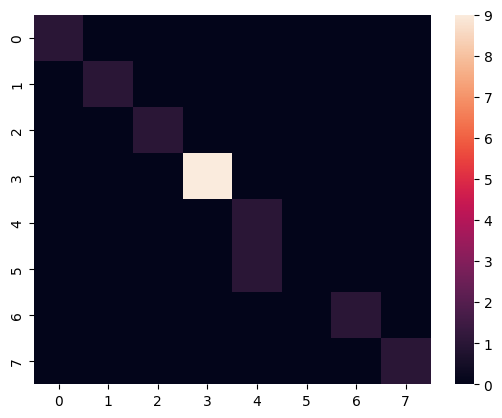

In [32]:
# Print the cross-validation scores and mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

# Fit the decision tree on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = dt.score(X_test, y_test)
print('Accuracy:', accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
sns.heatmap(cm)

#RandomForestClassifier

C:\Users\yasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.75       0.85714286 0.85714286 0.85714286 0.85714286]
Mean cross-validation score: 0.8357142857142857
Accuracy: 1.0
Confusion Matrix:



<Axes: >

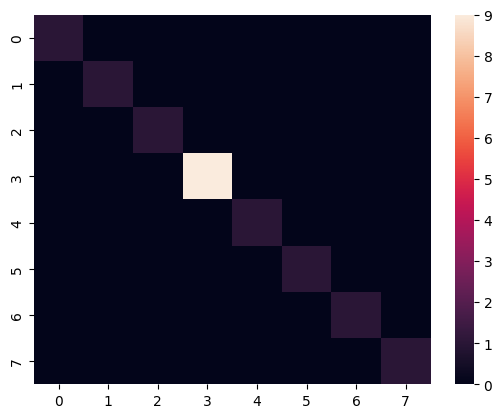

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Use cross-validation to evaluate the model
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print the cross-validation scores and mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
sns.heatmap(cm)

C:\Users\yasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.75       0.71428571 0.85714286 0.85714286 1.        ]
Mean cross-validation score: 0.8357142857142857
Accuracy: 1.0
Confusion Matrix:



<Axes: >

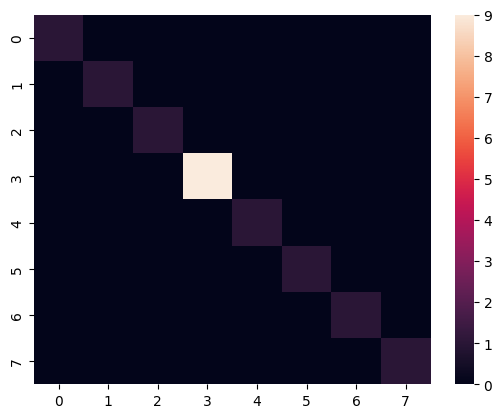

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Use cross-validation to evaluate the model
scores = cross_val_score(gb, X_train, y_train, cv=5)

# Print the cross-validation scores and mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = gb.score(X_test, y_test)
print('Accuracy:', accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n')
sns.heatmap(cm)

In [35]:
import pickle as pkl

with open("GradientBoostingClassifier.pkl", "wb") as f:
    pkl.dump(gb, f)

with open("RandomForestClassifier.pkl", "wb") as f:
    pkl.dump(rf, f)

with open("DecisionTreeClassifier.pkl", "wb") as f:
    pkl.dump(dt, f)

In [36]:
with open("label_encoders.pkl", "wb") as f:
    pkl.dump(label_encoders, f)